In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

# Folder_JB = 'J.Full_year_operational_cost/Results/B'
# Folder_JD = 'J.Full_year_operational_cost/Results/D'
# Folder_JE = 'J.Full_year_operational_cost/Results/E'
# Folder_JK = 'J.Full_year_operational_cost/Results/K'
# Folder_JL = 'J.Full_year_operational_cost/Results/L'

Folder_B = "B.Operation_cost"
DirName  = os.getcwd()
category_dict = {
                 Folder_B: "OPC",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [3]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    print(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv")
    return df

In [28]:
df_all = pd.DataFrame()

case = "IEEE118_mod1"
folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
nbcs = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

for nbc in nbcs:
    for folder in folders: 
        df = LoadingData(DirName,folder,"CostSummary",case,nbc,category_dict[folder])
        df_all = pd.concat([df_all,df])

if case == "IEEE118_mod1": 
    df_cost_bm = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc120/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc120.csv")
else:
    df_cost_bm = pd.read_csv(f"A.The_full_year_MILP/{case}/3.Out/oT_Result_CostSummary_{case}.csv")



df_cost_bm['CaseName'] = "Benchmark"
df_cost_bm['Case'] = case
df_cost_bm['Clustering method'] = "Benchmark"
df_cost_bm['Number of clusters'] = 400
df_cost_bm["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
df_all = pd.concat([df_all,df_cost_bm])
#df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")

J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc20.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_D

J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc120/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc120.csv
J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc130/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc130.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc130/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc130.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc130/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc130.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc130/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc130.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc130/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc130.csv
J.Full_year_operational_cost/Results/B.Operation_cost/

In [29]:
df_pivot = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR",aggfunc = "mean").drop("TotalSystemCost",axis = 1)

In [30]:
(df_pivot/df_pivot.loc["Benchmark"]-1)*100

Cost/Payment,ConsumptionOperationCost,EmissionCost,GenerationInvestmentCost,GenerationOperationCost,NetworkInvestmentCost,ReliabilityCost
Clustering method,,,,,,
Benchmark,NaN,0.000000,NaN,0.000000,0.000000,0.000000
CHI_fy,NaN,3.724626,NaN,3.576190,-12.054352,585.085490
HI_fy,NaN,1.873570,NaN,1.693219,-6.843312,944.097339
OPC_fy,NaN,0.855173,NaN,0.731795,0.010191,86.526544
OPT_LB_fy,NaN,8.919929,NaN,9.270298,-24.543524,1280.044032
R&D_fy,NaN,2.425216,NaN,2.287484,-7.048832,671.792027


<Axes: xlabel='Clustering method'>

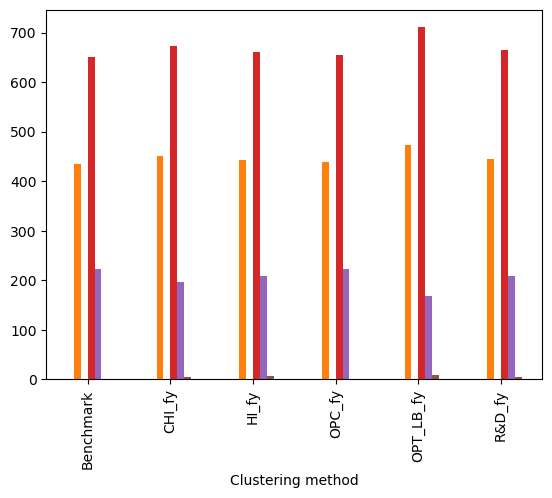

In [31]:
df_pivot.plot(kind = "bar",stacked = False,legend = False)